In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as pyo

In [ ]:
hourlyCalories=pd.read_csv('/content/clean_hourlyCalories.csv')
hourlyIntensity=pd.read_csv('/content/clean_hourlyIntensity.csv')
hourlySteps=pd.read_csv('/content/clean_hourlySteps.csv')

In [ ]:
print(hourlyCalories.sample())
print(hourlyIntensity.sample())
print(hourlySteps.sample())

              Id ActivityHour  Calories ActivityDay
1121  1624580081        20:00        76  2016-04-28
               Id ActivityHour  TotalIntensity  AverageIntensity ActivityDay
11051  4445114986        19:00              12               0.2  2016-05-07
              Id ActivityHour  StepTotal ActivityDay
3662  2022484408        10:00        198  2016-04-13


**MERGING**

In [ ]:
calint=hourlyCalories.merge(hourlyIntensity,on=['Id', 'ActivityDay', 'ActivityHour'], how='left')
calint.head()

Id ActivityHour  Calories ActivityDay  TotalIntensity  \
0  1503960366        00:00        81  2016-04-12              20   
1  1503960366        01:00        61  2016-04-12               8   
2  1503960366        02:00        59  2016-04-12               7   
3  1503960366        03:00        47  2016-04-12               0   
4  1503960366        04:00        48  2016-04-12               0   

   AverageIntensity  
0          0.333333  
1          0.133333  
2          0.116667  
3          0.000000  
4          0.000000

In [ ]:
final=calint.merge(hourlySteps,on=['Id', 'ActivityDay', 'ActivityHour'], how='left')
final.head()

Id ActivityHour  Calories ActivityDay  TotalIntensity  \
0  1503960366        00:00        81  2016-04-12              20   
1  1503960366        01:00        61  2016-04-12               8   
2  1503960366        02:00        59  2016-04-12               7   
3  1503960366        03:00        47  2016-04-12               0   
4  1503960366        04:00        48  2016-04-12               0   

   AverageIntensity  StepTotal  
0          0.333333        373  
1          0.133333        160  
2          0.116667        151  
3          0.000000          0  
4          0.000000          0

In [ ]:
final.to_csv('merged_hourlyStats.csv',index=False)

**DATA VISUALISATION**

**1. HEATMAP**

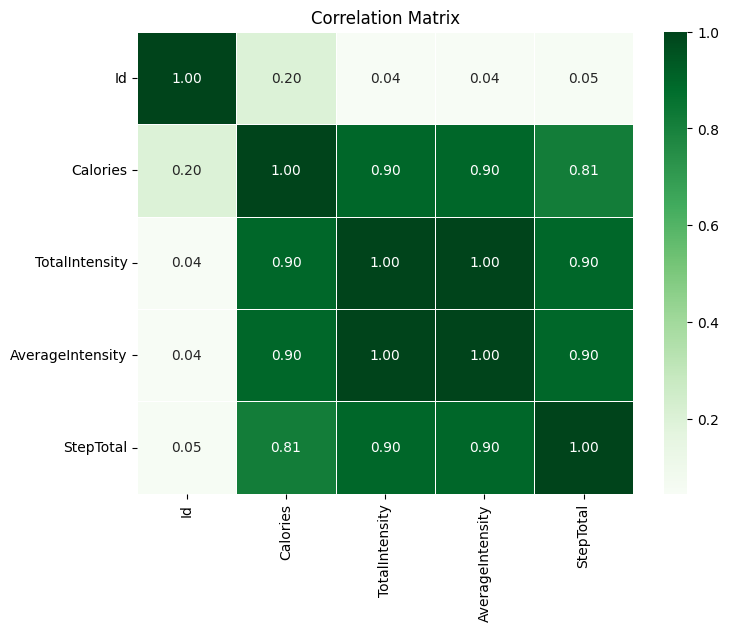

In [ ]:
num_column = final.select_dtypes(include='number')
matrix = num_column.corr()

pyo.figure(figsize =(8,6))
sns.heatmap(matrix, annot = True, cmap = 'Greens', fmt = '.2f', linewidths = 0.5)
pyo.title('Correlation Matrix')
pyo.show()


**2. BAR PLOT**

In [ ]:
fig1 = px.bar(final, x='ActivityHour', y='Calories', title='Calories per Hour',
              labels={'ActivityHour': 'Activity Hour', 'Calories': 'Calories'},
              barmode='overlay', color_discrete_sequence=['orange'])

# Show the generated bar plot
fig1.show()


**3.**

In [ ]:
fig = px.scatter(final, x='StepTotal', y='Calories', title='Scatter Plot: Step Total vs Calories',
                 labels={'StepTotal': 'Step Total', 'Calories': 'Calories'},
                 color_discrete_sequence=['purple'])

# Show the generated scatter plot
fig.show()

**4. PAIR PLOT**

In [ ]:
fig = px.scatter_matrix(final, dimensions=['Calories', 'TotalIntensity', 'StepTotal'],
                        title='Pair Plot of Fitness Tracker Metrics',
                        labels={'Calories': 'Calories', 'TotalIntensity': 'Total Intensity',
                                'StepTotal': 'Step Total'})

# Show the generated pair plot
fig.show()

In [ ]:
final.shape

(22099, 7)